In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input

In [36]:
df = pd.read_csv("/content/heart.data.csv")

In [37]:
df = df.drop(['Unnamed: 0'],axis = 1)
X = df.drop(['heart.disease'], axis=1)
y = df['heart.disease']

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = Sequential()
model.add(Input(shape=x_train.shape[1:]))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))

In [41]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [42]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4124 - val_loss: 1.8092
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2362 - val_loss: 1.7224
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2922 - val_loss: 1.6417
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2263 - val_loss: 1.5672
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0636 - val_loss: 1.4993
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8212 - val_loss: 1.4366
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9055 - val_loss: 1.3744
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7072 - val_loss: 1.3199
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5655 - val_loss: 1.2673
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6609 - val_loss: 1.2175
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4673 - val_loss: 1.1705
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4737 - val_l

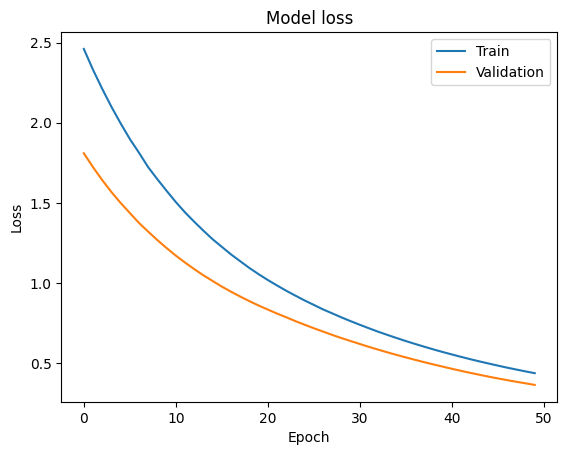

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

In [45]:
for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        print("Weights:", weights[0])
        print("Biases:", weights[1])

Weights: [[-0.71173006 -0.82271886]
 [-0.602973   -0.07410364]]
Biases: [-0.27668563  0.38179365]
Weights: [[-0.9346922]
 [ 1.1855644]]
Biases: [-0.19999795]


In [46]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.36402034285743434
R-squared: 0.582094636838428
